In [1]:
import json
from pathlib import Path
import matplotlib.pyplot as plt
from clip_layerwise_alignment.config import LOCAL_MODELS_DIR

In [2]:
def plot_training_history(
    projected_encoder: str,  # "text" or "image"
    layers: list[int],       # e.g., [6, 9, 11, 12]
    loss_to_plot: str = "val",  # "val" or "train"
    layer_colors: dict = None,
):
    """
    Plot training history for multiple layer projections.
    
    Args:
        projected_encoder: Which encoder was projected ("text" or "image")
        layers: List of layer numbers to plot
        loss_to_plot: "val" or "train"
        layer_colors: Dict mapping layer numbers to colors (optional)
    """
    # Default color scheme
    if layer_colors is None:
        raise ValueError("layer_colors parameter missing")
    
    # Determine target encoder (the one not being projected)
    target_encoder = "image" if projected_encoder == "text" else "text"
    loss_key = f"{loss_to_plot}_loss"
    
    plt.figure(figsize=(6, 6))
    
    for layer in layers:
        # Load history
        # Construct filename based on which encoder is projected
        if projected_encoder == "text":
            history_file = LOCAL_MODELS_DIR / "projections" / f"text_L{layer}_image_final_history.json"
        else:  # projected_encoder == "image"
            history_file = LOCAL_MODELS_DIR / "projections" / f"text_final_image_L{layer}_history.json"
        
        if not history_file.exists():
            print(f"Warning: {history_file} not found, skipping layer {layer}")
            continue
        
        with open(history_file, 'r') as f:
            history = json.load(f)
        
        epochs = [entry['epoch'] for entry in history]
        losses = [entry[loss_key] for entry in history]
        
        color = layer_colors.get(layer, '#7f7f7f')  # Default gray if not in dict
        plt.plot(epochs, losses, label=f'Layer {layer}', color=color, linewidth=2)
    
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel(f'{loss_to_plot.capitalize()} Loss', fontsize=12)
    plt.ylim(0, 5.75)
    plt.title(f'{projected_encoder.capitalize()} Encoder Layer Projections → {target_encoder.capitalize()} Final', 
              fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return plt.gcf()


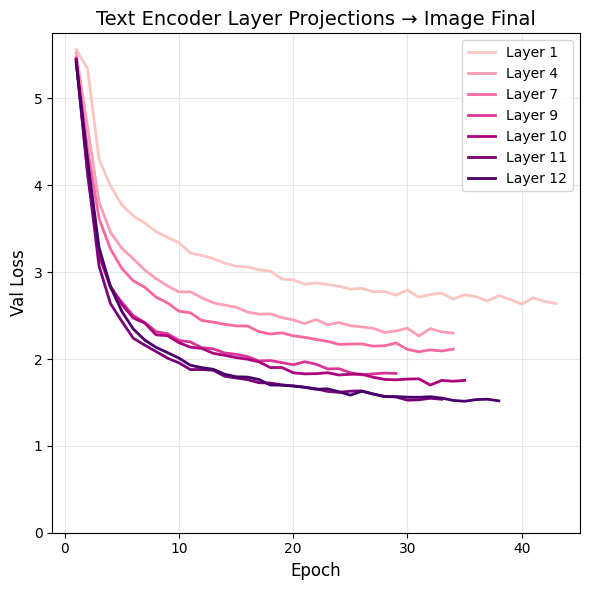

In [3]:
# Custom colors
layer_colors = {
    1: '#fcc5c0',
    4: '#fa9fb5',
    7: '#f768a1',
    9: '#dd3497',
    10: '#ae017e',
    11: '#7a0177',
    12: '#49006a',
}
fig3 = plot_training_history(
    projected_encoder="text",
    layers=list(layer_colors.keys()),
    loss_to_plot="val",
    layer_colors=layer_colors
)
plt.show()

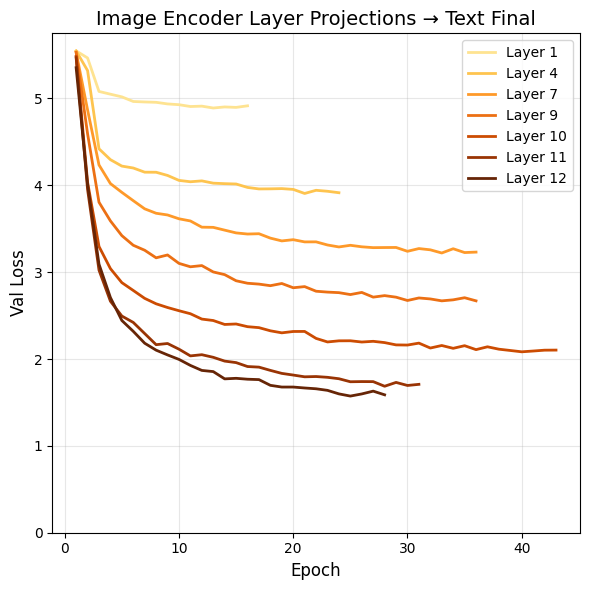

In [4]:
# Custom colors
layer_colors = {
    1: '#fee391',
    4: '#fec44f',
    7: '#fe9929',
    9: '#ec7014',
    10: '#cc4c02',
    11: '#993404',
    12: '#662506',
}
fig3 = plot_training_history(
    projected_encoder="image",
    layers=list(layer_colors.keys()),
    loss_to_plot="val",
    layer_colors=layer_colors
)
plt.show()

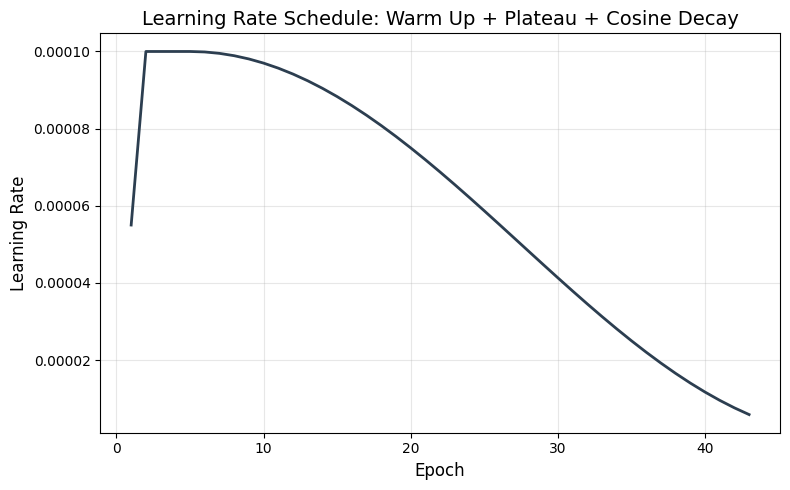

In [ ]:
def plot_learning_rate_schedule(
    projected_encoder: str,
    layer: int,
    lr_color: str = '#2c3e50',
):
    """
    Plot learning rate schedule for a single layer projection.
    
    Args:
        projected_encoder: Which encoder was projected ("text" or "image")
        layer: Layer number to plot LR for
        lr_color: Color for the LR curve
    """
    target_encoder = "image" if projected_encoder == "text" else "text"
    
    if projected_encoder == "text":
        history_file = LOCAL_MODELS_DIR / "projections" / f"text_L{layer}_image_final_history.json"
    else:
        history_file = LOCAL_MODELS_DIR / "projections" / f"text_final_image_L{layer}_history.json"
    
    with open(history_file, 'r') as f:
        history = json.load(f)
    
    epochs = [entry['epoch'] for entry in history]
    lrs = [entry['lr'] for entry in history]
    
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, lrs, color=lr_color, linewidth=2)
    
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Learning Rate', fontsize=12)
    plt.title(f'Learning Rate Schedule: Warm Up + Plateau + Cosine Decay', 
              fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return plt.gcf()

fig = plot_learning_rate_schedule("text", layer=1)
plt.show()